In [1]:
%pip install pykrige

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\adm1\OneDrive - USherbrooke\Documents\memoire\py_madaclim\workdir\input\gbif_mada_available_caff_content_w_caffeine.csv")
df

,specimen_id,longitude,latitude,caffeine_percent
0,C_humbertii_RNF785,43.797500,-22.875000,0.00
1,C_richardii_A575,50.041667,-14.101389,0.03
2,C_perrieri_A12,46.333889,-24.560833,0.00
3,C_perrieri_A12,46.333889,-24.560833,0.00
4,C_perrieri_A12,46.333889,-24.560833,0.00
...,...,...,...,...
521,C_resinosa_A8,47.000000,-23.000000,0.00
522,C_resinosa_A8,48.700000,-13.580000,0.00
523,C_dubardii_A969,49.700000,-13.180000,0.00
524,C_dubardii_A969,49.700000,-13.180000,0.00


In [11]:
lons = df['longitude'].tolist()
lats = df['latitude'].tolist()
values = df['caffeine_percent'].tolist()

# Display the extracted data
print("Longitudes:", lons)
print("Latitudes:", lats)
print("Caffeine Percent:", values)


Longitudes: [43.7975, 50.041667, 46.333889, 46.333889, 46.333889, 47.701944, 47.701944, 47.757778, 43.610638, 50.0, 45.993359, 49.353056, 44.272222, 47.166111, 47.136111, 44.28417, 44.30139, 44.31583, 44.32444, 44.31583, 44.31583, 47.85861, 46.015711, 46.015693, 45.920397, 45.923007, 44.583333, 43.625805, 43.625805, 44.690055, 44.1366, 44.1366, 44.272222, 49.786667, 49.35305, 48.556111, 49.28583, 49.1725, 49.218333, 44.561944, 49.308889, 48.31888, 48.2925, 49.35305, 49.301389, 47.700278, 49.70611, 47.724167, 49.861111, 44.272222, 44.263056, 50.074722, 48.76777, 49.256667, 49.23388, 49.35305, 49.405833, 49.45833, 43.625806, 50.016389, 49.218611, 48.80222, 49.218611, 49.318056, 49.21, 49.459444, 49.174722, 46.45, 48.73111, 49.340278, 48.554167, 49.2425, 44.145556, 44.561389, 44.472222, 49.218333, 44.561944, 49.308889, 50.0, 49.583333, 49.25666, 43.625806, 49.318056, 44.315803, 44.324308, 44.156111, 44.301506, 49.3375, 44.507222, 49.583333, 47.99, 44.561389, 49.3275, 46.674722, 48.4875, 4

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'linear' Variogram Model
Slope: 7.933851629512171e-14
Nugget: 0.0019625927045676893 



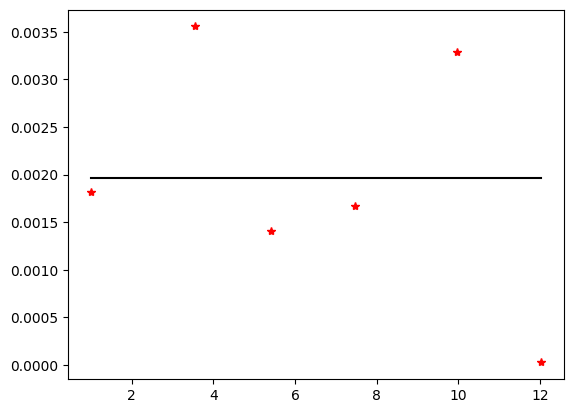

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



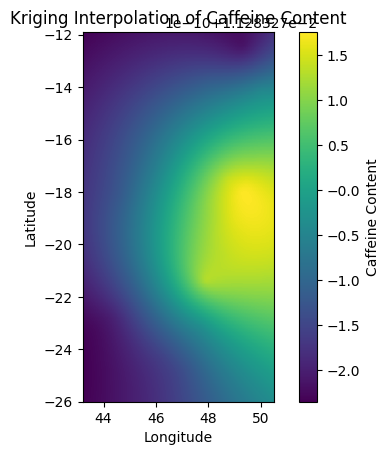

In [9]:
from pykrige.ok import OrdinaryKriging
import numpy as np
import matplotlib.pyplot as plt

# Create Ordinary Kriging model
OK = OrdinaryKriging(
    lons, lats, values,
    variogram_model='linear',  # or 'gaussian', 'exponential', 'spherical'
    #variogram_model='gaussian',  # or 'gaussian', 'exponential', 'spherical'
    #variogram_model='exponential',  # or 'gaussian', 'exponential', 'spherical'
    #variogram_model='spherical',  # or 'gaussian', 'exponential', 'spherical'
    verbose=True,
    enable_plotting=True
)

# Define the grid you want to interpolate over
grid_lon = np.linspace(43.2, 50.5, 100)
grid_lat = np.linspace(-26.0, -11.9, 100)

# Perform interpolation
z, ss = OK.execute('grid', grid_lon, grid_lat)

# Visualize the results
plt.imshow(z, extent=(43.2, 50.5, -26.0, -11.9), origin='lower')
plt.colorbar(label='Caffeine Content')
plt.title('Kriging Interpolation of Caffeine Content')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'linear' Variogram Model
Slope: 7.933851629512171e-14
Nugget: 0.0019625927045676893 



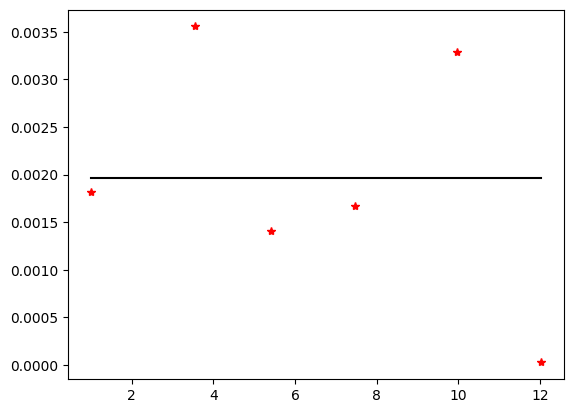

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



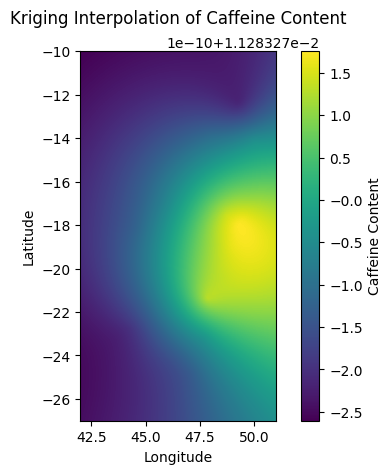

In [16]:
from pykrige.ok import OrdinaryKriging
import numpy as np
import matplotlib.pyplot as plt

# Create Ordinary Kriging model
OK = OrdinaryKriging(
    lons, lats, values,
    variogram_model='linear',  # or 'gaussian', 'exponential', 'spherical'
    verbose=True,
    enable_plotting=True
)

# Define a broader grid to cover the full island of Madagascar
grid_lon = np.linspace(42.0, 51.0, 200)  # Slightly wider than the previous range
grid_lat = np.linspace(-27.0, -10.0, 200)  # Extend further to the south and north

# Perform interpolation
z, ss = OK.execute('grid', grid_lon, grid_lat)

# Visualize the results
plt.imshow(z, extent=(42.0, 51.0, -27.0, -10.0), origin='lower')
plt.colorbar(label='Caffeine Content')
plt.title('Kriging Interpolation of Caffeine Content', pad=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


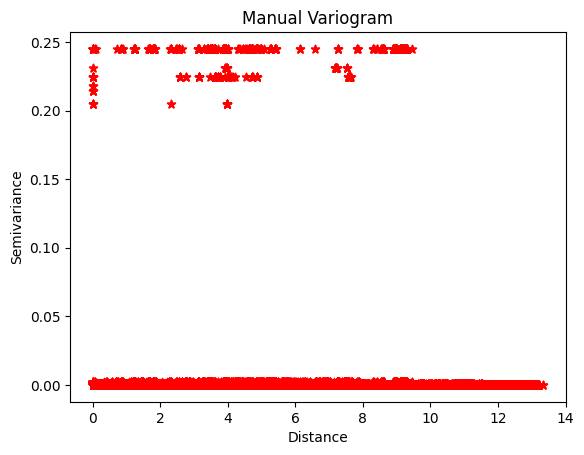

In [13]:
from scipy.spatial.distance import euclidean
import numpy as np
import matplotlib.pyplot as plt

# Example longitude, latitude, and caffeine content data


# Prepare to store distances and semivariances
distances = []
semivariances = []

# Calculate distances and semivariances for each pair of points
for i in range(len(values)):
    for j in range(i + 1, len(values)):
        # Calculate the Euclidean distance between points
        coord1 = (lons[i], lats[i])
        coord2 = (lons[j], lats[j])
        distance = euclidean(coord1, coord2)
        
        # Calculate the semivariance: 0.5 * (value1 - value2) ^ 2
        semivariance = 0.5 * (values[i] - values[j])**2
        
        # Store the values
        distances.append(distance)
        semivariances.append(semivariance)

# Create the variogram plot
plt.scatter(distances, semivariances, color='red', marker='*')
plt.xlabel("Distance")
plt.ylabel("Semivariance")
plt.title("Manual Variogram")
plt.show()


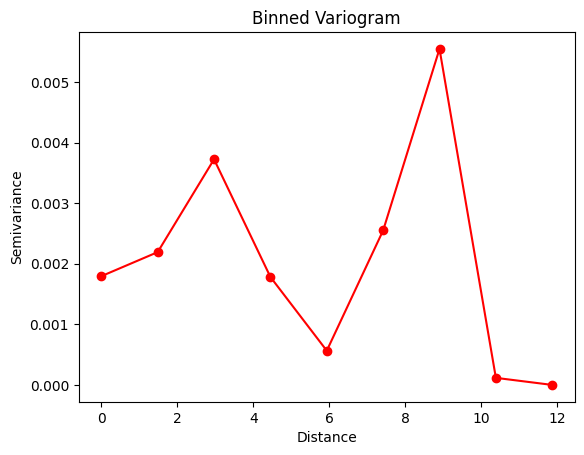

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from collections import defaultdict



# Prepare to store distances and semivariances
distances = []
semivariances = []

# Calculate distances and semivariances for each pair of points
for i in range(len(values)):
    for j in range(i + 1, len(values)):
        # Calculate the Euclidean distance between points
        coord1 = (lons[i], lats[i])
        coord2 = (lons[j], lats[j])
        distance = euclidean(coord1, coord2)
        
        # Calculate the semivariance: 0.5 * (value1 - value2) ^ 2
        semivariance = 0.5 * (values[i] - values[j])**2
        
        # Store the values
        distances.append(distance)
        semivariances.append(semivariance)

# Bin the distances
bins = np.linspace(0, max(distances), 10)  # Adjust the number of bins as needed
digitized = np.digitize(distances, bins)
binned_semivariances = [np.mean([semivariances[i] for i in range(len(semivariances)) if digitized[i] == b]) for b in range(1, len(bins))]

# Plot the binned variogram
plt.plot(bins[:-1], binned_semivariances, '-o', color='red')
plt.xlabel("Distance")
plt.ylabel("Semivariance")
plt.title("Binned Variogram")
plt.show()
